In [1]:
import pandas as pd

### Lendo Log

In [2]:
colnames=['timestamp', 'unbound_code', 'infor', 'ip_dns', 'query_argument', 'query_type', 'query_class', 'response_status', 'query_time', 'dd', 'msg_size_rcvd'] 
data = pd.read_csv("data/unbound.log.1", sep = " ", names = colnames)
data['timestamp'] = data['timestamp'].astype(str).str.replace(r'\[|\]|,', '')
data.head()

,timestamp,unbound_code,infor,ip_dns,query_argument,query_type,query_class,response_status,query_time,dd,msg_size_rcvd
0,1670554861,unbound[56651:1],info:,127.0.0.1,google.com?.,A,IN,NaN,NaN,NaN,NaN
1,1670554861,unbound[56651:1],info:,127.0.0.1,google.com?.,A,IN,NXDOMAIN,0.164186,0.0,115.0
2,1670554861,unbound[56651:1],info:,127.0.0.1,youtube.com?.,A,IN,NaN,NaN,NaN,NaN
3,1670554861,unbound[56651:1],info:,127.0.0.1,youtube.com?.,A,IN,NXDOMAIN,0.000000,1.0,116.0
4,1670554861,unbound[56651:2],info:,127.0.0.1,facebook.com?.,A,IN,NaN,NaN,NaN,NaN


In [3]:
data.count()

timestamp          3642
unbound_code       3642
infor              3642
ip_dns             3642
query_argument     3500
query_type         3642
query_class        3642
response_status    1892
query_time         1892
dd                 1892
msg_size_rcvd      1892
dtype: int64

### Filtros necessários

In [4]:
dataframe = data.query("ip_dns == '127.0.0.1' and response_status in ('NOERROR', 'NXDOMAIN')")
dataframe = dataframe[["timestamp","ip_dns","query_argument", "query_time"]]
dataframe.head()

,timestamp,ip_dns,query_argument,query_time
1,1670554861,127.0.0.1,google.com?.,0.164186
3,1670554861,127.0.0.1,youtube.com?.,0.000000
5,1670554861,127.0.0.1,facebook.com?.,0.000000
7,1670554861,127.0.0.1,a-msedge.net?.,0.000000
9,1670554861,127.0.0.1,microsoft.com?.,0.000000


In [5]:
#dataframe['response_status'].unique()
dataframe.groupby(['ip_dns'])['query_argument'].count()

ip_dns
127.0.0.1    1750
Name: query_argument, dtype: int64

In [6]:
#dataframe['response_status'].unique()
dataframe.groupby(['ip_dns'])['ip_dns'].count()

ip_dns
127.0.0.1    1750
Name: ip_dns, dtype: int64

In [7]:
dataframe = dataframe.astype({"timestamp":"int64","query_time":"double"})
dataframe.dtypes

timestamp           int64
ip_dns             object
query_argument     object
query_time        float64
dtype: object

In [8]:
dataframe['datetime'] = pd.to_datetime(dataframe['timestamp'],unit='s')
dataframe['date'] = dataframe['datetime'].dt.day
dataframe.head()

,timestamp,ip_dns,query_argument,query_time,datetime,date
1,1670554861,127.0.0.1,google.com?.,0.164186,2022-12-09 03:01:01,9
3,1670554861,127.0.0.1,youtube.com?.,0.000000,2022-12-09 03:01:01,9
5,1670554861,127.0.0.1,facebook.com?.,0.000000,2022-12-09 03:01:01,9
7,1670554861,127.0.0.1,a-msedge.net?.,0.000000,2022-12-09 03:01:01,9
9,1670554861,127.0.0.1,microsoft.com?.,0.000000,2022-12-09 03:01:01,9


date
9     1651
10      99
Name: query_argument, dtype: int64


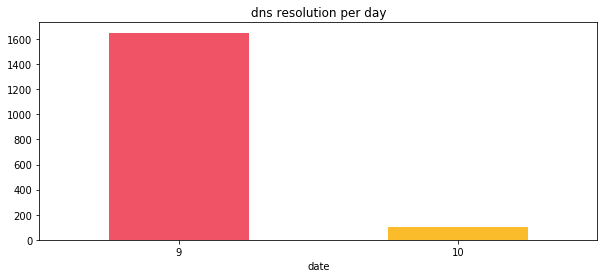

In [11]:
dns_per_day = dataframe.groupby(['date'])['query_argument'].count()
print(dns_per_day)
dns_per_day.plot(x='date', 
                kind='bar',
                rot=0,
                title='dns resolution per day',
                color=[(240/255,83/255,101/255), (250/255,188/255,42/255)],
                stacked=True,
                figsize=(10,4)
                )

In [12]:
teste = dataframe.groupby(['query_argument'])['date'].count()
teste.sort_values(ascending=[False]).head()

query_argument
google.com?.       20
mail.ru?.          18
microsoft.com?.    18
s-msedge.net?.     18
reddit.com?.       18
Name: date, dtype: int64